# Optimization results for the Power series, Fourier series and Gaussian superposition pulses

In [14]:
# !pip install uncertainties
# !pip install quantum_gates

In [15]:
# !pip install pandas>= 1.4.0

## Imports

In [123]:
import numpy as np
import pandas as pd
import json 
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
import ast

import sys
sys.path.append('../..')
from pulse_opt.pulses.power_factory import PowerFactory
from pulse_opt.pulses.fourier_factory import FourierFactory
from pulse_opt.pulses.gaussian_factory import GaussianFactory

In [124]:
def set_matplotlib_style(overwrite: dict={}):
    """Sets the rc parameters to pre-defined values.

    Use the overwrite lookup to overwrite the default behaviour.

    Args:
        overwrite (dict): Lookup table which can be used to overwrite the default values.
    """
    plt.rcParams.update({
        "axes.titlesize": 16,
        "axes.labelsize": 12,
        "lines.linewidth": 1.5,
        "lines.markersize": 5,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "legend.fontsize": "medium",
        "figure.figsize": (8, 6),
    })

    # Plot background -> white inside, transparent outside
    plt.rcParams.update({
        "figure.facecolor":  (1.0, 1.0, 1.0, 0.0),  # white with alpha = 0%
        "axes.facecolor":    (1.0, 1.0, 1.0, 1.0),  # white with alpha = 100%
        "savefig.facecolor": (1.0, 1.0, 1.0, 0.0),  # white with alpha = 0%
    })

    # Plot error bars
    plt.rcParams.update({
        "errorbar.capsize":  8,  # Length of the error bar caps
    })

    # Overwrite default behaviour
    if isinstance(overwrite, dict) and len(overwrite) > 0:
        plt.rcParams.update(overwrite)
    return


def activate_latex(preamble_list: list[str]=[]):
    """Activates LaTeX for use in Matplotlib and import some packages.

    Imported packages include amsmath, amssymb, and braket.

    Examples:
        preamble_list = ['\\usepackage{myfancypackage}'] where the string has an r as prefix.

    Args:
        preample_list (list[str]): List of raw str that represent the lines of the LaTeX preample used for imports.
    """

    pgf_with_latex = {
        "text.usetex": True,
        "font.family": "sans-serif",
        "font.sans-serif": ["Helvetica"],
        "text.latex.preamble": "\n".join([
            r"\usepackage[utf8]{inputenc}",
            r"\usepackage[T1]{fontenc}",
            r"\usepackage{amsmath}",
            r"\usepackage{amssymb}",
            r"\usepackage{braket}",
        ] + preamble_list)
    }
    mpl.rcParams.update(pgf_with_latex)
    return

In [125]:
set_matplotlib_style()

## Paths

In [126]:
rel_folder = "../../results/integrals"
plot_folder = "../../plots/integrals"

In [127]:
import os

def create_folder(path):
    folders = path.split('/')
    current_path = ''
    for folder in folders:
        current_path += folder + '/'
        if not os.path.exists(current_path):
            os.makedirs(current_path)

## Settings

In [242]:
theta = 2.356194
theta_str = "pi three quarter"

## Data loading 

In [243]:
runs = [
        'power_test',
        'fourier_test',
        'gaussian_test',
        'power_small',
        'fourier_small',
        'gaussian_small',
        'power',
        'fourier',
        'gaussian'
]
pd_lookup = {
    run: pd.read_csv(f"{rel_folder}/{run}/results.csv") for run in runs
}

In [244]:
# Query dfs to only contain rows for certain theta value
pd_lookup = {
    run: df.loc[abs(df['theta'] - theta) <= 1e-1] for run, df in pd_lookup.items()
}

In [245]:
factory_lookup = {
    'power_test': PowerFactory,
    'fourier_test': FourierFactory,
    'gaussian_test': GaussianFactory,
    'power_small': PowerFactory, 
    'fourier_small': FourierFactory,
    'gaussian_small': GaussianFactory,
    'power': PowerFactory,
    'fourier': FourierFactory,
    'gaussian': GaussianFactory
}

In [246]:
pd_lookup["power_test"].head()

,Unnamed: 0,name,description,loss,loss_path,weights,a,shift,n,theta,...,constr_violation,execution_time,tr_radius,constr_penalty,barrier_parameter,barrier_tolerance,status,niter,success,message


In [247]:
pd_lookup["power_small"].head()

,Unnamed: 0,name,description,loss,loss_path,weights,a,shift,n,theta,...,constr_violation,execution_time,tr_radius,constr_penalty,barrier_parameter,barrier_tolerance,status,niter,success,message
2,2,power_small,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,1,2.356194,...,0.000000e+00,0.421239,7.537276e+03,1.0,3.200000e-05,3.200000e-05,1,38,True,`gtol` termination condition is satisfied.
6,6,power_small,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,2,2.356194,...,2.262190e-12,2.060730,7.659275e+04,1.0,6.400000e-06,6.400000e-06,1,185,True,`gtol` termination condition is satisfied.
10,10,power_small,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,3,2.356194,...,4.685141e-13,1.442738,1.930972e+06,1.0,2.560000e-07,2.560000e-07,1,105,True,`gtol` termination condition is satisfied.
14,14,power_small,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,4,2.356194,...,0.000000e+00,6.887189,2.484980e-01,1.0,2.048000e-09,2.048000e-09,1,155,True,`gtol` termination condition is satisfied.
18,18,power_small,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,5,2.356194,...,3.552714e-15,9.303718,6.639785e-09,1.0,2.048000e-09,2.048000e-09,2,147,True,`xtol` termination condition is satisfied.


In [248]:
pd_lookup["power"]

,Unnamed: 0,name,description,loss,loss_path,weights,a,shift,n,theta,...,constr_violation,execution_time,tr_radius,constr_penalty,barrier_parameter,barrier_tolerance,status,niter,success,message
2,2,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,1,2.356194,...,0.000000e+00,0.597620,7.537276e+03,1.0,3.200000e-05,3.200000e-05,1,38,True,`gtol` termination condition is satisfied.
6,6,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,2,2.356194,...,2.262190e-12,3.511069,7.659275e+04,1.0,6.400000e-06,6.400000e-06,1,185,True,`gtol` termination condition is satisfied.
10,10,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,3,2.356194,...,4.685141e-13,3.300217,1.930972e+06,1.0,2.560000e-07,2.560000e-07,1,105,True,`gtol` termination condition is satisfied.
14,14,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,4,2.356194,...,0.000000e+00,12.472077,2.484980e-01,1.0,2.048000e-09,2.048000e-09,1,155,True,`gtol` termination condition is satisfied.
18,18,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,5,2.356194,...,3.552714e-15,23.012285,6.639785e-09,1.0,2.048000e-09,2.048000e-09,2,147,True,`xtol` termination condition is satisfied.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,422,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,1.0,6,2.356194,...,2.842171e-14,58.142596,8.867337e-09,1.0,2.048000e-09,2.048000e-09,2,267,True,`xtol` termination condition is satisfied.
426,426,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,1.0,7,2.356194,...,1.421085e-14,112.514792,7.774804e-09,1.0,2.048000e-09,2.048000e-09,2,437,True,`xtol` termination condition is satisfied.
430,430,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,1.0,8,2.356194,...,4.074519e-14,109.511021,9.887392e-09,1.0,2.048000e-09,2.048000e-09,2,314,True,`xtol` termination condition is satisfied.
434,434,power,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,1.0,9,2.356194,...,3.197442e-14,130.531415,8.417757e-09,1.0,2.048000e-09,2.048000e-09,2,360,True,`xtol` termination condition is satisfied.


In [249]:
pd_lookup["fourier_test"]

,Unnamed: 0,name,description,loss,loss_path,weights,a,shift,n,theta,...,constr_violation,execution_time,tr_radius,constr_penalty,barrier_parameter,barrier_tolerance,status,niter,success,message


In [250]:
pd_lookup["fourier_small"]

,Unnamed: 0,name,description,loss,loss_path,weights,a,shift,n,theta,...,constr_violation,execution_time,tr_radius,constr_penalty,barrier_parameter,barrier_tolerance,status,niter,success,message
2,2,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.00,1,2.356194,...,0.000000e+00,9.368409,2.872640e+06,1.0,1.024000e-08,1.024000e-08,1,102,True,`gtol` termination condition is satisfied.
6,6,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.00,2,2.356194,...,1.776357e-15,23.589489,6.759670e-09,1.0,2.048000e-09,2.048000e-09,2,131,True,`xtol` termination condition is satisfied.
10,10,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.00,3,2.356194,...,6.217249e-15,677.403224,4.414715e-07,1.0,6.400000e-06,6.400000e-06,0,1000,False,The maximum number of function evaluations is ...
14,14,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.00,4,2.356194,...,0.000000e+00,405.056491,7.000000e-01,1.0,1.000000e-01,1.000000e-01,0,1000,False,The maximum number of function evaluations is ...
18,18,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.00,5,2.356194,...,3.552714e-15,898.515493,8.011112e-07,1.0,6.400000e-06,6.400000e-06,0,1000,False,The maximum number of function evaluations is ...
22,22,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.25,1,2.356194,...,1.399769e-12,3.244604,7.773817e+05,1.0,1.280000e-06,1.280000e-06,1,36,True,`gtol` termination condition is satisfied.
26,26,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.25,2,2.356194,...,0.000000e+00,27.129723,1.101231e-09,1.0,2.048000e-09,2.048000e-09,2,150,True,`xtol` termination condition is satisfied.
30,30,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.25,3,2.356194,...,4.862777e-14,321.581702,7.672842e-09,1.0,2.048000e-09,2.048000e-09,2,702,True,`xtol` termination condition is satisfied.
34,34,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.25,4,2.356194,...,5.329071e-15,333.030437,5.773448e-09,1.0,2.048000e-09,2.048000e-09,2,464,True,`xtol` termination condition is satisfied.
38,38,fourier_small,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.25,5,2.356194,...,1.350031e-13,899.841245,7.213265e+00,1.0,1.280000e-06,1.280000e-06,0,1000,False,The maximum number of function evaluations is ...


In [251]:
pd_lookup["fourier"].head()

,Unnamed: 0,name,description,loss,loss_path,weights,a,shift,n,theta,...,constr_violation,execution_time,tr_radius,constr_penalty,barrier_parameter,barrier_tolerance,status,niter,success,message
2,2,fourier,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,1,2.356194,...,0.000000e+00,20.695022,2.872640e+06,1.0,1.024000e-08,1.024000e-08,1,102,True,`gtol` termination condition is satisfied.
6,6,fourier,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,2,2.356194,...,1.776357e-15,39.132985,6.759670e-09,1.0,2.048000e-09,2.048000e-09,2,131,True,`xtol` termination condition is satisfied.
10,10,fourier,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,3,2.356194,...,6.217249e-15,731.067197,4.414715e-07,1.0,6.400000e-06,6.400000e-06,0,1000,False,The maximum number of function evaluations is ...
14,14,fourier,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,4,2.356194,...,0.000000e+00,473.899148,7.000000e-01,1.0,1.000000e-01,1.000000e-01,0,1000,False,The maximum number of function evaluations is ...
18,18,fourier,Configuration to test the Fourier Pulses with ...,FourierLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.0,5,2.356194,...,3.552714e-15,999.294125,8.011112e-07,1.0,6.400000e-06,6.400000e-06,0,1000,False,The maximum number of function evaluations is ...


In [252]:
pd_lookup["gaussian_test"].head()

,Unnamed: 0,name,description,loss,loss_path,weights,a,scale,n,theta,...,x,optimality,constr_violation,execution_time,tr_radius,constr_penalty,status,niter,success,message


In [253]:
pd_lookup["gaussian_small"].head()

,Unnamed: 0,name,description,loss,loss_path,weights,a,scale,n,theta,...,x,optimality,constr_violation,execution_time,tr_radius,constr_penalty,status,niter,success,message
2,2,gaussian_small,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.1,1,2.356194,...,[1.00000057],0.000000e+00,0.000000e+00,0.003952,1.000000e+00,1.0,1,1,True,`gtol` termination condition is satisfied.
6,6,gaussian_small,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.1,2,2.356194,...,[ 4.48932517 -2.48932517],6.636516e-09,0.000000e+00,37.159381,1.138036e+00,1.0,1,13,True,`gtol` termination condition is satisfied.
10,10,gaussian_small,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.1,3,2.356194,...,[ 4.5022212 -0.0124356 -2.47735002],5.450658e-09,0.000000e+00,214.403497,1.586021e+00,1.0,1,38,True,`gtol` termination condition is satisfied.
14,14,gaussian_small,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.1,4,2.356194,...,[ 4.82184563 -0.32948699 0.28775761 -2.73842267],2.646518e-08,0.000000e+00,358.099720,7.339896e-09,1.0,2,32,True,`xtol` termination condition is satisfied.
18,18,gaussian_small,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.1,5,2.356194,...,[ 5.20479529 -0.51671026 0.03091969 0.373544...,5.668569e-08,4.440892e-16,607.167669,5.639441e-09,1.0,2,45,True,`xtol` termination condition is satisfied.


In [254]:
pd_lookup["gaussian"].head()

,Unnamed: 0,name,description,loss,loss_path,weights,a,scale,n,theta,...,x,optimality,constr_violation,execution_time,tr_radius,constr_penalty,status,niter,success,message
2,2,gaussian,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.05,1,2.356194,...,[1.],0.000000e+00,0.000000e+00,0.004251,1.000000e+00,1.0,1,1,True,`gtol` termination condition is satisfied.
6,6,gaussian,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.05,2,2.356194,...,[ 4.40911739 -2.40911739],9.481189e-09,2.220446e-16,58.630674,6.565374e+00,1.0,1,13,True,`gtol` termination condition is satisfied.
10,10,gaussian,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.05,3,2.356194,...,[ 4.41168662e+00 -2.52870041e-03 -2.40662922e+00],2.445818e-09,2.220446e-16,199.902669,7.642948e-01,1.0,1,21,True,`gtol` termination condition is satisfied.
14,14,gaussian,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.05,4,2.356194,...,[ 4.46487287 -0.06614819 0.06060789 -2.45379226],1.935115e-08,4.440892e-16,554.475909,6.965787e-09,1.0,2,34,True,`xtol` termination condition is satisfied.
18,18,gaussian,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.losses,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.05,5,2.356194,...,[ 4.53186016e+00 -1.00416810e-01 1.97036315e-...,3.563948e-08,2.220446e-16,1305.529306,7.248395e-09,1.0,2,41,True,`xtol` termination condition is satisfied.


## Prepare pulse and fun lookups

In [255]:
import re

def replace_whitespace_with_comma(string):
    return re.sub(r'(?<=\d|\.)\s+', ',', string.strip())

In [256]:
pulse_lookup = {}
key_lookup = {
    run: (
        ["n", "scale"] if "gaussian" in run else ["n", "shift"]
) for run in runs}

for run, df in pd_lookup.items(): 
    pulses = []
    for index, row in df.iterrows(): 
        args = {key: row[key] for key in key_lookup[run]}
        factory = factory_lookup[run]
        # Workaround to deal with json encoding -> Todo: Make cleaner.
        coeff_str = replace_whitespace_with_comma(row["x"])
        coeff = eval(coeff_str)
        coefficients = np.array(coeff)
        pulse_factory = factory(**args, perform_checks=False)
        pulse = pulse_factory.sample(coefficients)
        pulses.append(pulse)
    pulse_lookup[run] = pulses

In [257]:
fun_lookup = {}

for run, df in pd_lookup.items(): 
    funs = [row['fun'] for index, row in df.iterrows()]
    fun_lookup[run] = funs

In [258]:
fun_lookup

{'power_test': [],
 'fourier_test': [],
 'gaussian_test': [],
 'power_small': [2.973992571390011,
  1.284460379246569,
  1.271162628397212,
  0.8790922589731475,
  0.8772801358874257,
  2.4021290241342017,
  1.9177669098240868,
  1.8325587627984643,
  1.7853191950353038,
  1.5246665200624168,
  1.3648869466139573,
  1.2487056561123762,
  0.901499940849926,
  0.8315097416282626,
  0.7066321349278124,
  1.3648869466139866,
  1.245197439037344,
  0.8607022202509779,
  0.8455944455462533,
  0.7531779099524654,
  1.3648869466154785,
  1.2451974390578404,
  0.8607023491382335,
  0.8315145409018282,
  0.740762515543765],
 'fourier_small': [1.8142545946905748,
  0.8524577139439065,
  1.382438338178114,
  1.5366348984531606,
  0.8748461345262745,
  1.210355774444699,
  0.8381904008118088,
  0.7031395851101778,
  0.6702367198511833,
  0.8637388025260164,
  0.8750710365601913,
  0.7148254766620734,
  0.7067572730666649,
  0.6592736003977295,
  0.6505990341960795,
  0.8750710364756078,
  0.7152570

In [259]:
class_args_lookup = {}

for run, df in pd_lookup.items(): 
    class_args_list = []
    for index, row in df.iterrows(): 
        args = {key: row[key] for key in key_lookup[run]}
        class_args_list.append(args)
    class_args_lookup[run] = class_args_list

In [260]:
class_args_lookup

{'power_test': [],
 'fourier_test': [],
 'gaussian_test': [],
 'power_small': [{'n': 1, 'shift': 0.0},
  {'n': 2, 'shift': 0.0},
  {'n': 3, 'shift': 0.0},
  {'n': 4, 'shift': 0.0},
  {'n': 5, 'shift': 0.0},
  {'n': 1, 'shift': 0.25},
  {'n': 2, 'shift': 0.25},
  {'n': 3, 'shift': 0.25},
  {'n': 4, 'shift': 0.25},
  {'n': 5, 'shift': 0.25},
  {'n': 1, 'shift': 0.5},
  {'n': 2, 'shift': 0.5},
  {'n': 3, 'shift': 0.5},
  {'n': 4, 'shift': 0.5},
  {'n': 5, 'shift': 0.5},
  {'n': 1, 'shift': 0.75},
  {'n': 2, 'shift': 0.75},
  {'n': 3, 'shift': 0.75},
  {'n': 4, 'shift': 0.75},
  {'n': 5, 'shift': 0.75},
  {'n': 1, 'shift': 1.0},
  {'n': 2, 'shift': 1.0},
  {'n': 3, 'shift': 1.0},
  {'n': 4, 'shift': 1.0},
  {'n': 5, 'shift': 1.0}],
 'fourier_small': [{'n': 1, 'shift': 0.0},
  {'n': 2, 'shift': 0.0},
  {'n': 3, 'shift': 0.0},
  {'n': 4, 'shift': 0.0},
  {'n': 5, 'shift': 0.0},
  {'n': 1, 'shift': 0.25},
  {'n': 2, 'shift': 0.25},
  {'n': 3, 'shift': 0.25},
  {'n': 4, 'shift': 0.25},
  {'n':

In [261]:
coefficients_lookup = {}

for run, df in pd_lookup.items(): 
    coefficient_list = []
    class_args_list = []
    for index, row in df.iterrows(): 
        args = {key: row[key] for key in key_lookup[run]}
        factory = factory_lookup[run]
        # Workaround to deal with json encoding -> Todo: Make cleaner.
        coeff_str = replace_whitespace_with_comma(row["x"])
        coeff = eval(coeff_str)
        coefficients = np.array(coeff)
        coefficient_list.append(coefficients)
    coefficients_lookup[run] = coefficient_list

In [262]:
coefficients_lookup

{'power_test': [],
 'fourier_test': [],
 'gaussian_test': [],
 'power_small': [array([1.06753849e-03, 1.99786492e+00]),
  array([ 1.11247142e-03, -1.25755255e+01,  2.18599508e+01]),
  array([ 1.00295936e-03, -8.43631901e+00,  5.23681889e+00,  1.38862010e+01]),
  array([ 1.00054988e-03, -6.30114079e+01,  3.90481179e+02, -7.38471013e+02,
          4.34810318e+02]),
  array([ 1.00029430e-03, -5.45813932e+01,  3.00821539e+02, -4.44319722e+02,
          5.62163762e+01,  1.67115031e+02]),
  array([1.13613014e-03, 3.99545548e+00]),
  array([ 1.00065693e-03,  1.65594674e+01, -2.15373772e+01]),
  array([ 8.79850190e-03,  1.44702760e+01, -2.43259695e+01,  1.17909722e+01]),
  array([ 8.02561717e-03,  1.37325348e+01, -2.52583548e+01,  1.14207173e+01,
          7.34651189e+00]),
  array([ 6.19934152e-03,  1.06290331e+01, -2.88364316e+01,  1.97440782e+01,
          1.38318100e+01,  1.14837778e+01]),
  array([1.        , 9.15106407]),
  array([1.18472290e-03, 9.45332816e+00, 1.19857833e+01]),
  array

## Visualization

# Visualizations 2
We iterate over the runs and plot them all at the same time. 

In [263]:
def convert_value_to_color(value):
    if value < 0 or value > 5:
        raise ValueError("Value must be between 0 and 5")
    colormap = plt.cm.get_cmap('RdYlBu_r')
    norm_value = value / 5.0
    color = colormap(norm_value)
    return color

In [264]:
def plot_runs(runs: list, pulse_lookup: dict, fun_lookup: dict, coefficients_lookup: dict, class_args_lookup: dict): 
    for run in runs: 
        # Lookup
        pulses = pulse_lookup[run]
        funs = fun_lookup[run]
        coefficients_list = coefficients_lookup[run]
        factoryClass = factory_lookup[run]
        class_arg_list = class_args_lookup[run]
        
        # Plot
        fig, ax = plt.subplots()
        for pulse, fun, coefficients, class_args in zip(pulses, funs, coefficients_list, class_arg_list): 
            x = np.linspace(0.0, 1.0, 100)
            waveform = pulse.get_pulse()
            y = np.array([waveform(s) for s in x])
            plt.plot(x, y, color=convert_value_to_color(fun), label=str(coefficients))
        plt.xlabel('Parametrization variable t')
        plt.ylabel("s [1]")
        plt.title(f"Optimized pulses with {run.replace('_', ' ')} ansatz")
        
        # Add color map
        cmap = plt.cm.get_cmap('RdYlBu_r')
        norm = plt.Normalize(vmin=0, vmax=5)
        sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
        sm.set_array([])
        fig.colorbar(sm, ax=ax, label='Loss')
        
        # Create folder to save
        create_folder(f"{plot_folder}/{run}")
        
        # Save
        plt.savefig(f"{plot_folder}/{run}/optimized_waveform_theta_{theta_str}.pdf")
        
        # Show
        plt.show()

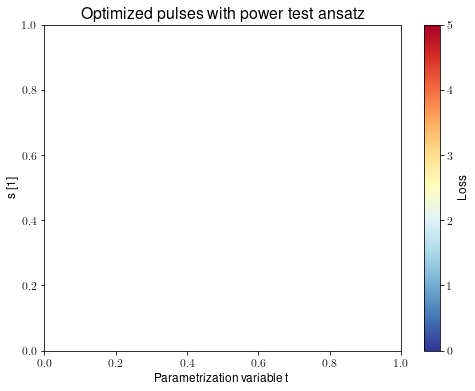

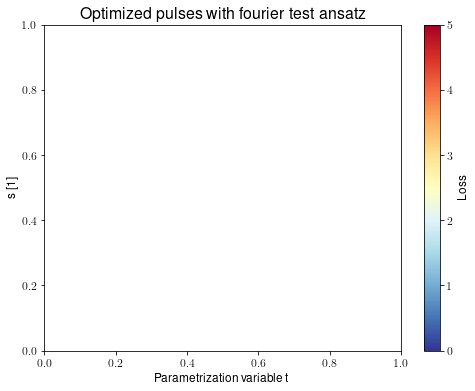

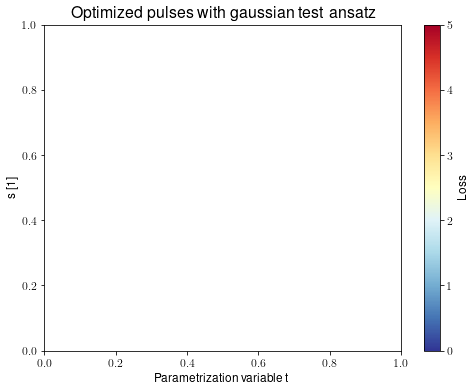

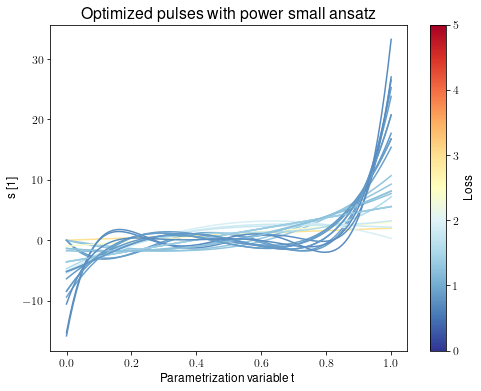

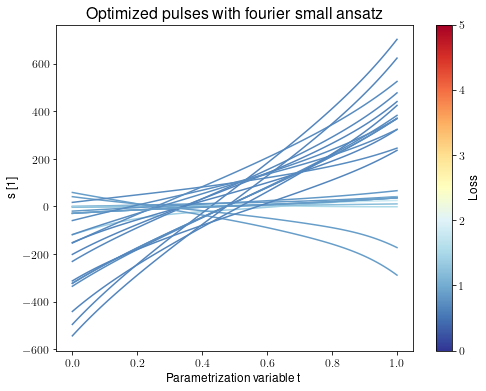

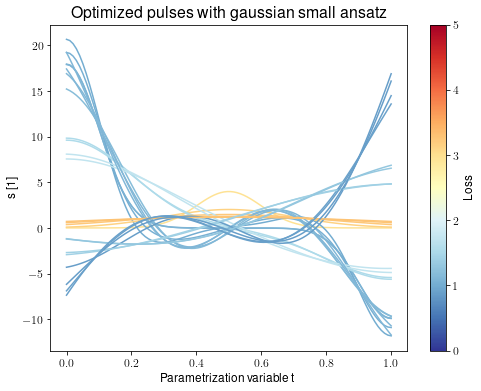

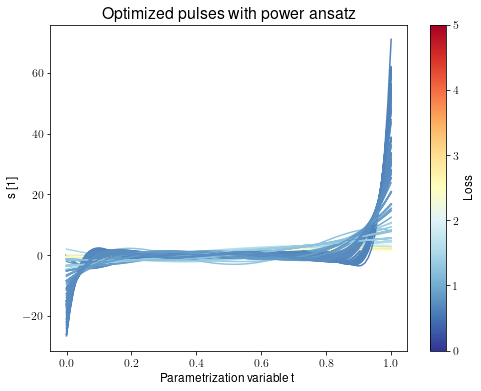

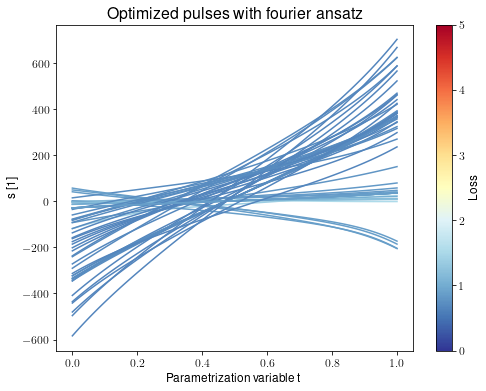

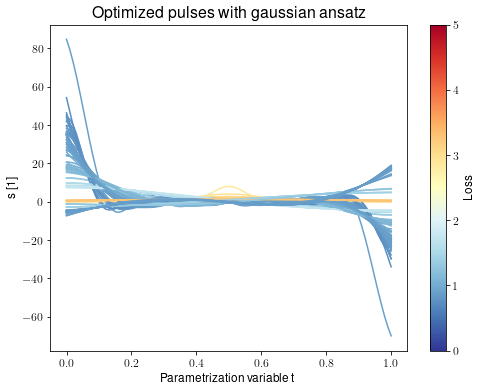

In [265]:
plot_runs(runs, pulse_lookup, fun_lookup, coefficients_lookup, class_args_lookup)

In [266]:
def plot_runs_parametrizations(runs: list, pulse_lookup: dict, fun_lookup: dict, coefficients_lookup: dict, class_args_lookup: dict): 
    for run in runs: 
        pulses = pulse_lookup[run]
        funs = fun_lookup[run]
        coefficients_list = coefficients_lookup[run]
        factoryClass = factory_lookup[run]
        class_arg_list = class_args_lookup[run]
        
        fig, ax = plt.subplots()
        for pulse, fun, coefficients, class_args in zip(pulses, funs, coefficients_list, class_arg_list): 
            x = np.linspace(0.0, 1.0, 100)
            waveform = pulse.get_parametrization()
            y = np.array([waveform(s) for s in x])
            plt.plot(x, y, color=convert_value_to_color(fun), label=str(coefficients))
        plt.xlabel('Parametrization variable t')
        plt.ylabel(r"$\theta$ [1]")
        plt.title(f"Optimized pulse parametrizations with {run.replace('_', ' ')} ansatz")
        
        cmap = plt.cm.get_cmap('RdYlBu_r')
        norm = plt.Normalize(vmin=0, vmax=5)
        sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
        sm.set_array([])
        fig.colorbar(sm, ax=ax, label='Loss')
        
        
        # Create folder to save
        create_folder(f"{plot_folder}/{run}")
        
        # Save
        plt.savefig(f"{plot_folder}/{run}/optimized_parametrization_theta_{theta_str}.pdf")
        
        # Show
        plt.show()

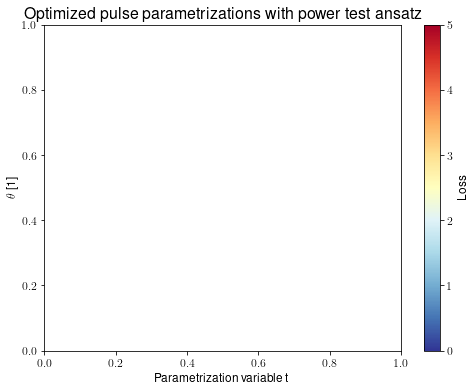

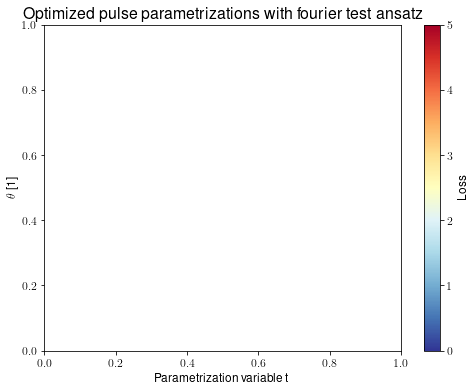

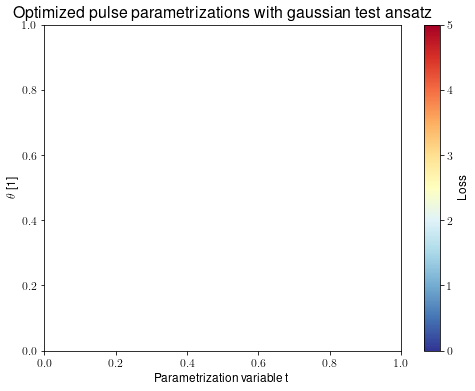

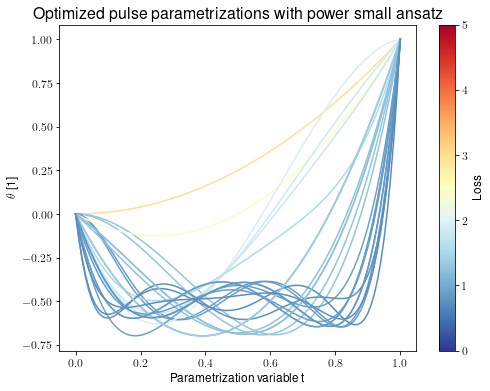

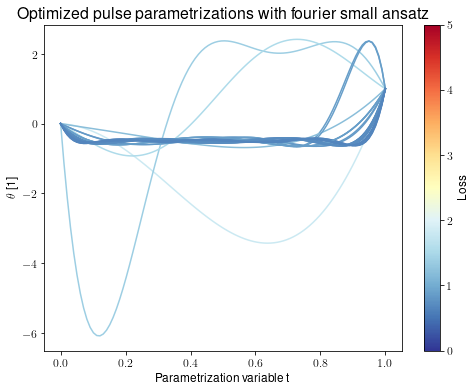

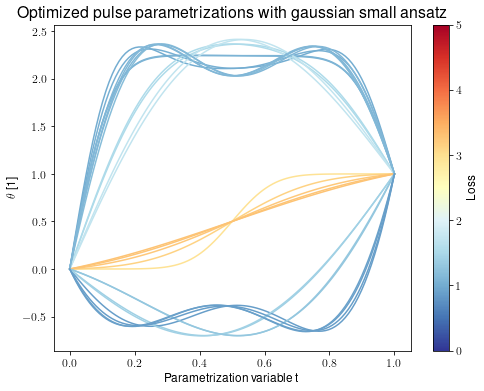

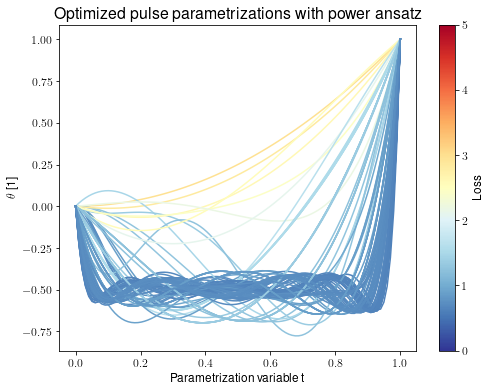

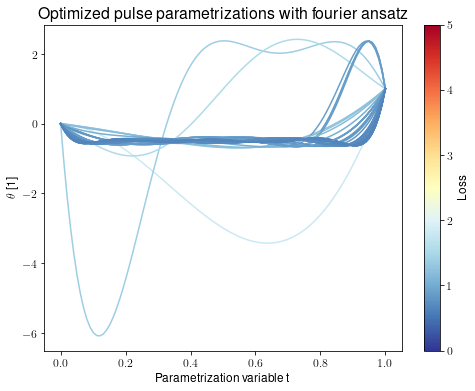

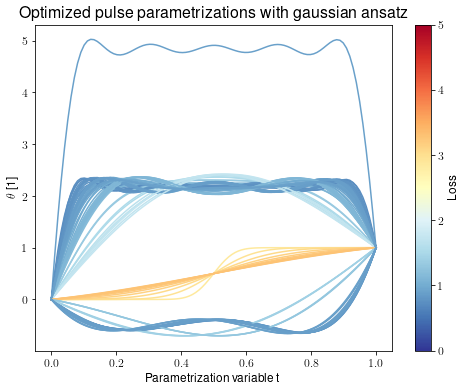

In [267]:
plot_runs_parametrizations(runs, pulse_lookup, fun_lookup, coefficients_lookup, class_args_lookup)

## Loss analysis
To understand the result, we have to better understand the Ito integrals, later referred to as integrands. 

In [268]:
from pulse_opt.integrals.utilities import integrand_lookup

In [211]:
total_integrand = lambda theta: sum((integrand(theta) for integrand in integrand_lookup.values()))

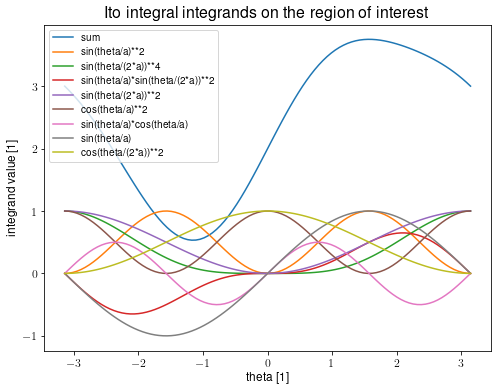

In [212]:
plt.figure()
x = np.linspace(-np.pi, np.pi, 100)
y = np.array([total_integrand(s) for s in x])
plt.plot(x, y, label="sum")
for name, integrand in integrand_lookup.items(): 
    y = np.array([integrand(s) for s in x])
    plt.plot(x, y, label=name)
plt.title("Ito integral integrands on the region of interest")
plt.xlabel('theta [1]')
plt.ylabel('integrand value [1]')
plt.legend()
create_folder(f"{plot_folder}/integrands")
plt.savefig(f"{plot_folder}/integrands/ito_integral_integrands.pdf")
plt.show()

We now count how many times each integral comes up in the gates. For the general single qubit gate: 

"sin(theta/(2*a))**4": 1x

"sin(theta/a)*sin(theta/(2*a))**2": 1x

"sin(theta/a)": 2x

"sin(theta/(2*a))**2": 2x

"sin(theta/a)**2": 2x

"sin(theta/a)*cos(theta/a)": 1x

"cos(theta/a)**2": 1x

"cos(theta/(2*a))**2: 1x
        
We see that not all integrals have the same weight. In the decomposition of the Noisy gate they also appear in different parts. 

In [213]:
single_qubit_loss_weights = {
    "sin(theta/(2*a))**4": 1.0,
    "sin(theta/a)*sin(theta/(2*a))**2": 1.0,
    "sin(theta/a)": 2.0,
    "sin(theta/(2*a))**2": 2.0,
    "sin(theta/a)**2": 2.0,
    "sin(theta/a)*cos(theta/a)": 1.0,
    "cos(theta/a)**2": 1.0,
    "cos(theta/(2*a))**2": 1.0,
}

In [214]:
single_qubit_loss = lambda theta: sum((integrand_lookup[integrand](theta) * weight) for integrand, weight in single_qubit_loss_weights.items())

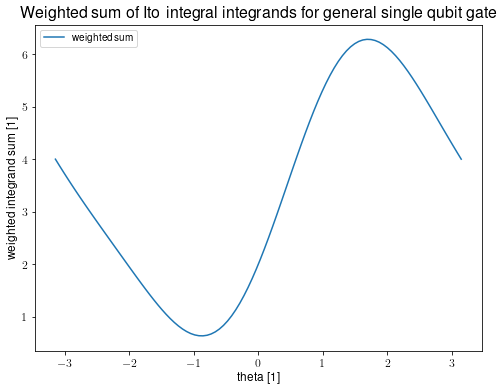

In [215]:
plt.figure()
x = np.linspace(-np.pi, np.pi, 100)
y = np.array([single_qubit_loss(s) for s in x])
plt.plot(x, y, label="weighted sum")
plt.title("Weighted sum of Ito integral integrands for general single qubit gate")
plt.xlabel('theta [1]')
plt.ylabel('weighted integrand sum [1]')
plt.legend()
create_folder(f"{plot_folder}/integrands")
plt.savefig(f"{plot_folder}/integrands/ito_integral_integrand_weighted_sum_general_single_qubit_gate.pdf")
plt.show()